# Simulation Analysis Workflow

This notebook provides a complete analysis workflow for cilia simulations:
1. Load simulation data
2. Visualize basal and blob positions
3. Plot final simulation frame
4. Generate kymograph
5. Analyze wavelength using slope-based segmentation

All outputs are saved to `analysis_output/{category}_{date}/{N}fil/` subdirectories.

In [1]:
# Import libraries
import sys
sys.path.append('.')
from plotting_and_analysis_functions import *
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Define the simulation path
# Adjust the date and path according to your actual simulation
sim_path = '../data/spacing_0/20251013/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift'

# Parameters (adjust these to match your simulation)
filament_length = 49.4  # Filament length in simulation units (L)
num_steps = 500         # Steps per period
sphere_radius = 197.6   # Sphere radius in simulation units
num_segs = 20           # Number of segments per filament

## 1. Load Simulation Data

In [2]:
# Load the simulation data
print("=" * 60)
print("LOADING SIMULATION DATA")
print("=" * 60)
sim = load_simulation(sim_path, num_steps=num_steps, sphere_radius=sphere_radius, num_segs=num_segs)
print(f"\n✅ Successfully loaded simulation:")
print(f"   • Timesteps: {sim.phases.shape[0]}")
print(f"   • Filaments: {sim.phases.shape[1]}")
print(f"   • Segments per filament: {sim.num_segs}")
print(f"   • Sphere radius: {sim.sphere_radius:.2f} units = {sim.sphere_radius/filament_length:.2f} L")
print(f"   • Filament length: {filament_length:.2f} units (L)")
print(f"   • Time duration: {sim.times[-1]:.2f} periods")
print("=" * 60)

LOADING SIMULATION DATA


[info] Using num_steps=500 for time normalization.

✅ Successfully loaded simulation:
   • Timesteps: 15001
   • Filaments: 360
   • Segments per filament: 20
   • Sphere radius: 197.60 units = 4.00 L
   • Filament length: 49.40 units (L)
   • Time duration: 150.00 periods


## 2. Basal and Blob Position Visualization


PLOTTING BASAL POSITIONS


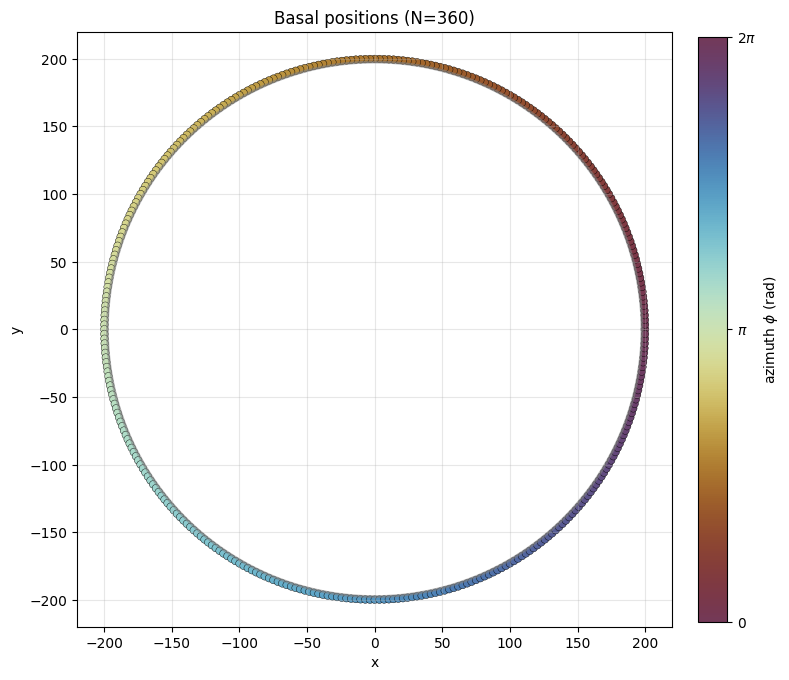

[info] Saved basal positions to analysis_output/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_basal_azimuth.png
✅ Basal positions saved


In [3]:
# Plot basal positions
print("\n" + "=" * 60)
print("PLOTTING BASAL POSITIONS")
print("=" * 60)
fig_basal, ax_basal = plot_basal_positions(
    sim_path,
    sim=sim,
    color_by="azimuth",
    show=True,
    save=True
)
plt.close(fig_basal)
print("✅ Basal positions saved")


PLOTTING BLOB POSITIONS (Isometric View)


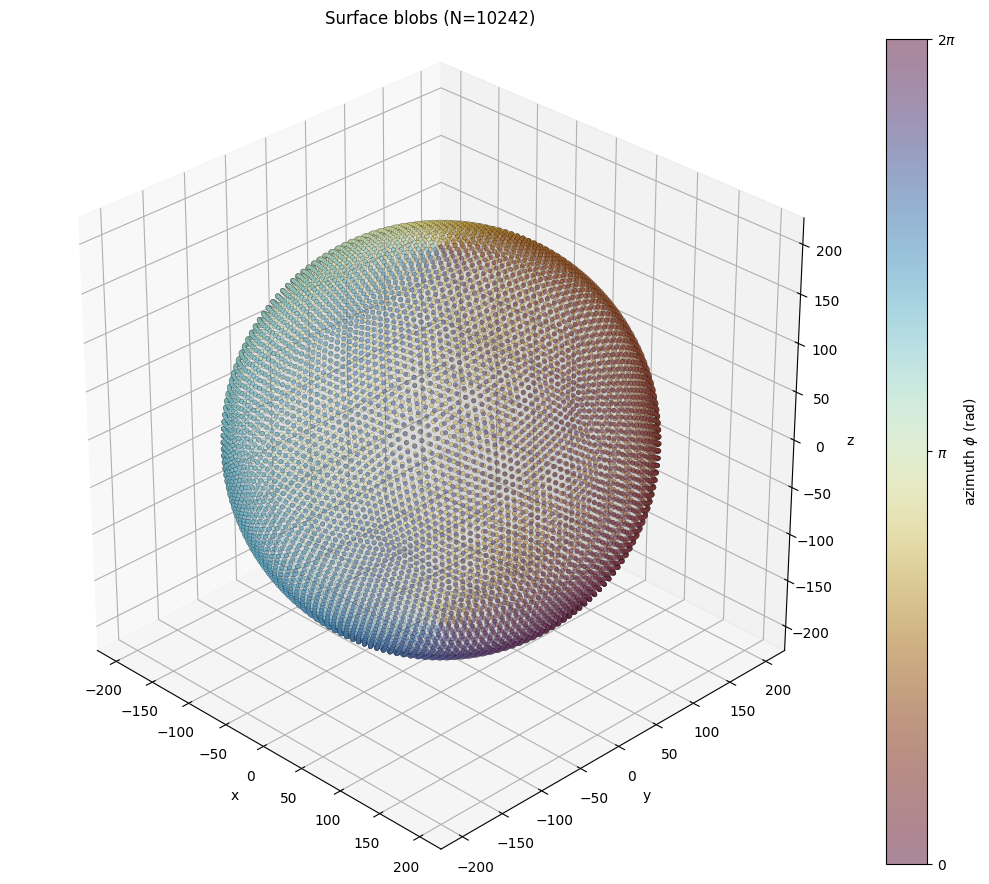

[info] Saved blob positions to analysis_output/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_blobs_iso_azimuth.png
✅ Blob positions saved


In [4]:
# Plot blob positions (3D isometric view)
print("\n" + "=" * 60)
print("PLOTTING BLOB POSITIONS (Isometric View)")
print("=" * 60)
fig_blobs, ax_blobs = plot_blob_positions(
    sim_path,
    sim=sim,
    view="iso",
    color_by="azimuth",
    split_hemispheres=False,
    show=True,
    save=True
)
plt.close(fig_blobs)
print("✅ Blob positions saved")

## 3. Final Simulation Frame


PLOTTING FINAL FRAME
Final frame index: 15000 (t = 150.00 periods)


/data/pz723/cuda-filaments/analysis/plotting_and_analysis_functions.py:388: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


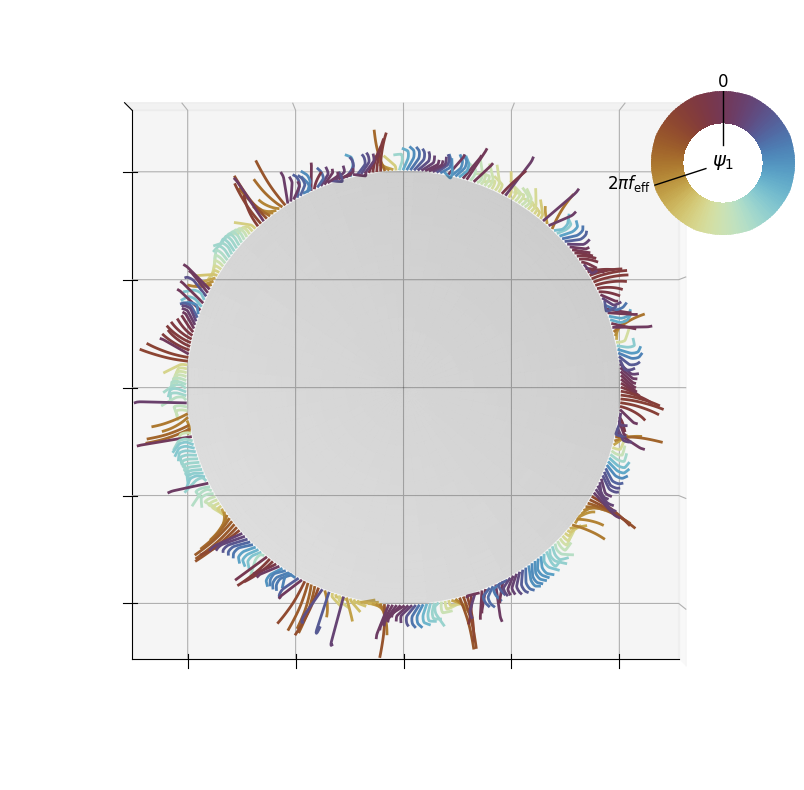

[info] Saved frame to analysis_output/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_frame_last_top.png


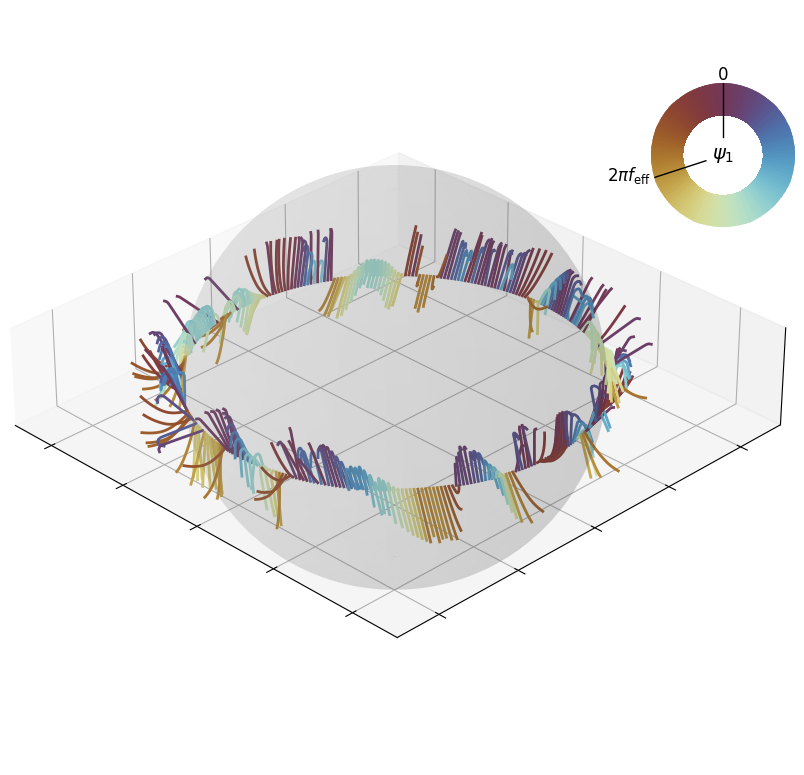

[info] Saved frame to analysis_output/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_frame_last_iso.png
✅ Final frame visualizations saved


In [5]:
# Plot the final frame (last timestep)
print("\n" + "=" * 60)
print("PLOTTING FINAL FRAME")
print("=" * 60)
print(f"Final frame index: {sim.phases.shape[0]-1} (t = {sim.times[-1]:.2f} periods)")

# Top-down view
fig_final_top, ax_final_top = plot_frame(
    sim_path,
    sim=sim,
    frame="last",
    view="top",
    color_by_phase=True,
    show=True,
    save=True
)
plt.close(fig_final_top)

# Isometric view
fig_final_iso, ax_final_iso = plot_frame(
    sim_path,
    sim=sim,
    frame="last",
    view="iso",
    color_by_phase=True,
    show=True,
    save=True
)
plt.close(fig_final_iso)
print("✅ Final frame visualizations saved")

## 4. Kymograph Analysis


GENERATING KYMOGRAPH


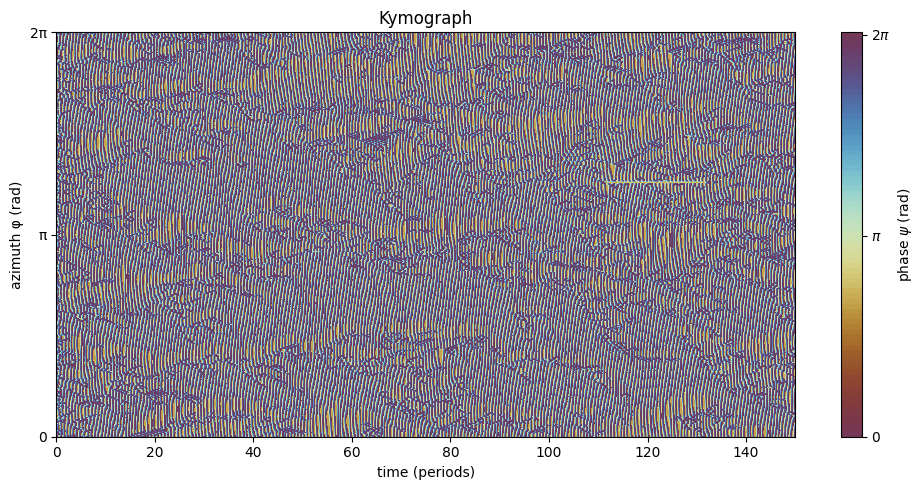

[info] Saved kymograph to analysis_output/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_kymograph_phi.png
✅ Kymograph saved
   Note: Any gaps in the azimuthal coverage appear as blank regions


In [6]:
# Generate kymograph
print("\n" + "=" * 60)
print("GENERATING KYMOGRAPH")
print("=" * 60)
fig_kymo, ax_kymo = plot_kymograph(
    sim_path,
    sim=sim,
    use_phi_axis=True,  # Show azimuthal gaps naturally
    show=True,
    save=True
)
plt.close(fig_kymo)
print("✅ Kymograph saved")
print("   Note: Any gaps in the azimuthal coverage appear as blank regions")

## 5. Wavelength Analysis (Slope-Based Segmentation)

In [ ]:
# Perform slope-based wavelength analysis
print("\n" + "=" * 60)
print("ANALYZING WAVELENGTH (Slope-Based Segmentation)")
print("=" * 60)
print("Using ruptures library to detect constant-slope segments...")
print("This identifies coherent wave regions and their propagation direction.\n")

try:
    wavelength_result = estimate_wavelength_slopes(
        sim_path,
        sim=sim,
        n_time_points=20,           # Analyze last 20 time points
        ruptures_penalty=5.0,        # Higher = fewer segments detected
        min_slope_threshold=0.1,     # Minimum slope to be considered coherent
        show_analysis=True
    )

    print("\n" + "=" * 60)
    print("WAVELENGTH ANALYSIS RESULTS")
    print("=" * 60)
    print(f"\nWAVE COHERENCE:")
    print(f"  Positive waves:  {wavelength_result.percent_positive_wave:.1f}% of equator")
    print(f"  Negative waves:  {wavelength_result.percent_negative_wave:.1f}% of equator")
    print(f"  Incoherent:      {wavelength_result.percent_incoherent:.1f}% of equator")
    
    print(f"\nPOSITIVE WAVES (n={wavelength_result.n_positive_segments} segments):")
    if wavelength_result.n_positive_segments > 0:
        print(f"  Mean wavelength: {wavelength_result.mean_wavelength_positive:.4f} rad")
        print(f"                   ({wavelength_result.mean_wavelength_positive*180/np.pi:.2f}°)")
        print(f"                   ({wavelength_result.mean_wavelength_positive*sim.sphere_radius:.2f} units)")
        print(f"                   ({wavelength_result.mean_wavelength_positive*sim.sphere_radius/filament_length:.2f} L)")
        print(f"  Std deviation:   {wavelength_result.std_wavelength_positive:.4f} rad")
    else:
        print("  (No positive waves detected)")
    
    print(f"\nNEGATIVE WAVES (n={wavelength_result.n_negative_segments} segments):")
    if wavelength_result.n_negative_segments > 0:
        print(f"  Mean wavelength: {wavelength_result.mean_wavelength_negative:.4f} rad")
        print(f"                   ({wavelength_result.mean_wavelength_negative*180/np.pi:.2f}°)")
        print(f"                   ({wavelength_result.mean_wavelength_negative*sim.sphere_radius:.2f} units)")
        print(f"                   ({wavelength_result.mean_wavelength_negative*sim.sphere_radius/filament_length:.2f} L)")
        print(f"  Std deviation:   {wavelength_result.std_wavelength_negative:.4f} rad")
    else:
        print("  (No negative waves detected)")
    
    print(f"\nTOTAL SEGMENTS ANALYZED: {len(wavelength_result.coherent_wavelengths)}")
    print(f"TIME POINTS ANALYZED: {wavelength_result.n_time_points}")
    print("=" * 60)

except ImportError as e:
    print("\n" + "!" * 60)
    print("ERROR: Missing required package")
    print("!" * 60)
    print("The slope-based wavelength analysis requires the 'ruptures' package.")
    print("\nInstall it with:")
    print("  pip install ruptures")
    print("\nOr use conda:")
    print("  conda install -c conda-forge ruptures")
    print("!" * 60)


ANALYZING WAVELENGTH (Fourier Method)
Analyzing phase patterns using spatial FFT...
This method handles ablation gaps through interpolation.



NameError: name 'estimate_wavelength_fourier' is not defined

## Summary

All analysis complete! Output files saved to `analysis_output/{category}_{date}/{N}fil/` directory:

- **Basal positions**: Shows where cilia attach to the sphere
- **Blob positions**: Shows the discrete representation of the sphere surface
- **Final frame**: Shows the cilia configuration at the end of the simulation
- **Kymograph**: Shows phase evolution over time and space
- **Wavelength analysis**: Uses slope-based segmentation to identify coherent waves

**Wavelength Analysis Method:**
The analysis uses the `ruptures` library to detect regions of constant phase slope (dψ/dφ):
- **Positive waves**: Regions where phase increases with azimuthal angle (metachronal wave propagates in +φ direction)
- **Negative waves**: Regions where phase decreases with azimuthal angle (wave propagates in -φ direction)
- **Incoherent**: Regions with very small slope (no clear wave propagation)

For each coherent segment, wavelength λ = 2π / |slope|, where slope = dψ/dφ.

**Note on units:**
- Time is reported in **periods** (beat cycles)
- Wavelengths are reported in **radians**, **degrees**, **simulation units**, and **filament lengths (L)**
- Coherence is reported as **percentage of the equator** covered by each wave type

In [ ]:
# Print file locations
print("\n" + "=" * 60)
print("OUTPUT FILE LOCATIONS")
print("=" * 60)

# Construct the output subdirectory path
sim_path_obj = Path(sim_path)
parent_name = sim_path_obj.parent.name
grandparent_name = sim_path_obj.parent.parent.name
out_subdir = f"{grandparent_name}_{parent_name}/{sim.num_fils}fil"
output_dir = Path("analysis_output") / out_subdir

print(f"Output directory: {output_dir}")
print()

if output_dir.exists():
    files = sorted(output_dir.glob("*"))
    for f in files:
        print(f"  • {f.name}")
else:
    print("  (Output directory not yet created)")
print("=" * 60)
print("\n✅ ANALYSIS COMPLETE!")


OUTPUT FILE LOCATIONS
Output directory: analysis_output/spacing_0_20251013/360fil

  (Output directory not yet created)

✅ ANALYSIS COMPLETE!
